In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, MaxPool2D

import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

import cv2

In [6]:
#Reading one image
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

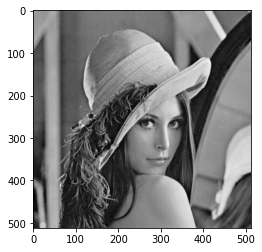

In [7]:
img = img
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
#finding the shape of the image
img.shape

(512, 512)

In [11]:
#keras expects batches of image so let's add one more dimensions to make one image into a batch
img_batch = img.reshape(1, img.shape[0], img.shape[1], 1)
img_batch.shape

(1, 512, 512, 1)

In [14]:
#creating the convolution model
model = Sequential()
model.add(Convolution2D(1, (15,15), padding='valid', input_shape = img_batch.shape[1:]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 498, 498, 1)       226       
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [15]:
conv_img = model.predict(img_batch)

In [16]:
conv_img.shape

(1, 498, 498, 1)

In [18]:
#reshape and show the output of convolution operation
conv_img_show = conv_img.reshape(conv_img.shape[1], conv_img.shape[2])
print(conv_img_show)

[[282.18634  284.15717  286.06415  ... 153.72467  163.3141   171.61636 ]
 [282.5327   283.62732  286.54144  ... 152.78954  163.44925  167.12846 ]
 [282.47852  280.87967  282.35626  ... 157.42804  163.9543   162.6449  ]
 ...
 [101.52815  111.18185  124.51065  ... 126.09347  120.17952  124.40982 ]
 [101.402954 108.67439  119.00748  ... 126.07289  123.86052  128.03879 ]
 [102.53286  106.01091  114.64621  ... 128.2157   126.105865 134.99252 ]]


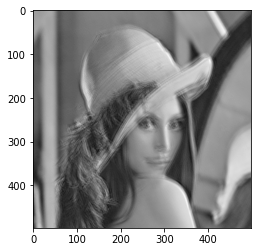

In [19]:
plt.imshow(conv_img_show, cmap='gray')
plt.show()

#### Let's apply activation function now. Rectified linear unit in this case.

In [23]:
model1 = Sequential()
model1.add(Convolution2D(1, (15,15), padding='valid', input_shape = img_batch.shape[1:]))
model1.add(Activation('relu'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 498, 498, 1)       226       
_________________________________________________________________
activation (Activation)      (None, 498, 498, 1)       0         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [34]:
conv_img1 = model1.predict(img_batch)

In [35]:
#reshape and show the output of convolution operation
conv_img_show1 = conv_img1.reshape(conv_img1.shape[1], conv_img1.shape[2])
print(conv_img_show1)

[[8.2277023e+01 8.2999527e+01 8.2583855e+01 ... 2.7026718e+01
  1.6883934e+01 5.7181664e+00]
 [8.3847366e+01 8.6625244e+01 8.3956268e+01 ... 9.5370140e+00
  1.2856953e+01 6.6276550e-02]
 [8.6923973e+01 8.3343430e+01 8.3078590e+01 ... 9.3319283e+00
  8.0492439e+00 0.0000000e+00]
 ...
 [1.9450199e+01 1.4184301e+01 5.2669849e+00 ... 2.9820715e+01
  3.1255516e+01 3.4087402e+01]
 [2.1626596e+01 1.5157314e+01 0.0000000e+00 ... 3.3429836e+01
  3.3650871e+01 4.1111153e+01]
 [2.8517796e+01 2.4068436e+01 7.6615486e+00 ... 3.6357334e+01
  4.4213768e+01 5.6887779e+01]]


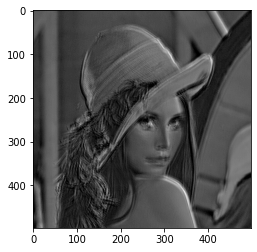

In [36]:
plt.imshow(conv_img_show1, cmap='gray')
plt.show()

#### After applying RELU, the image turns little darker because negative (minus) values after convolution operation will be replaced by zero.

In [28]:
#combining both relu and maxpooling on a convoluted image

In [30]:
model2 = Sequential()
model2.add(Convolution2D(1, (15,15), padding='valid', input_shape = img_batch.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 498, 498, 1)       226       
_________________________________________________________________
activation_1 (Activation)    (None, 498, 498, 1)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 1)       0         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [38]:
conv_img2 = model2.predict(img_batch)

In [39]:
#reshape and show the output of convolution operation
conv_img_show2 = conv_img2.reshape(conv_img2.shape[1], conv_img2.shape[2])
print(conv_img_show2)

[[ 65.82721    63.636833   62.684525  ...  96.79091   101.278625
  102.96146  ]
 [ 68.12371    64.30302    62.886612  ...  90.681274   93.71341
   82.75112  ]
 [ 64.04812    62.52997    64.26422   ...  80.7121     74.817955
   76.37674  ]
 ...
 [ 34.056595   17.740793    0.        ...  14.464624   21.513039
   11.224032 ]
 [ 35.961987   16.960527    0.        ...   7.7012796   3.6758385
    5.551544 ]
 [ 35.763706   20.253838    0.        ...   6.334902    1.7356262
    0.       ]]


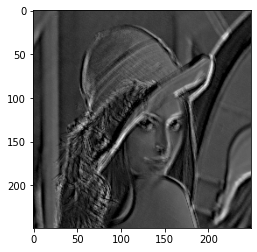

In [40]:
plt.imshow(conv_img_show2, cmap='gray')
plt.show()